##  Data understanding and preps

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('power_multi_household_daily.csv')
df.head()

,meter_id,date,daily_mean_power,daily_std_power,daily_min_power,daily_max_power,voltage_mean,voltage_std,intensity_mean
0,MTR_001,2006-12-16,2.617495,0.882098,0.222336,6.660460,236.243763,2.922896,13.082828
1,MTR_001,2006-12-17,2.018833,1.032528,0.097898,6.024453,240.087028,4.051467,9.999028
2,MTR_001,2006-12-18,1.311082,0.862724,0.065486,5.258530,241.231694,3.719576,6.421667
3,MTR_001,2006-12-19,0.992268,1.063872,0.020072,6.750390,241.999313,3.069492,4.926389
4,MTR_001,2006-12-20,1.325185,1.134982,0.026983,5.161571,242.308063,3.345704,6.467361


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14420 entries, 0 to 14419
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   meter_id          14420 non-null  object 
 1   date              14420 non-null  object 
 2   daily_mean_power  14330 non-null  float64
 3   daily_std_power   14330 non-null  float64
 4   daily_min_power   14330 non-null  float64
 5   daily_max_power   14330 non-null  float64
 6   voltage_mean      14330 non-null  float64
 7   voltage_std       14330 non-null  float64
 8   intensity_mean    14330 non-null  float64
dtypes: float64(7), object(2)
memory usage: 1014.0+ KB


In [5]:
pd.read_csv('kplc_daily_schedule.csv')

,date,scheduled_outage_today,n_scheduled_events,total_scheduled_minutes
0,2026-01-18,1,3,1380.0
1,2026-01-20,1,4,1950.0
2,2026-01-21,1,2,960.0
3,2026-01-22,1,3,1380.0
4,2026-01-23,1,1,450.0


In [6]:
pd.read_csv('kplc_planned_outages.csv')

,area,date,start_time,end_time,affected_customers
0,Part Of Lunga Lunga Road And Likoni Road,2026-01-18,08:00,17:00,"House of Manji, Wheatabix, Part of Likoni Rd, ..."
1,Whole Of Garage Road,2026-01-20,09:00,17:00,Whole of Garage Rd & adjacent customers.
2,Whole Of Mpweke Lane,2026-01-22,09:00,17:00,"Total South B, Part of Kapiti Rd, Whole of Mpw..."
3,Ongata Rongai,2026-01-21,09:00,17:00,"Whole of Gataka Rd from Masai Mall, Kisumu Ndo..."
4,Parts Of Kuresoi North,2026-01-21,09:00,17:00,"Murundu Mkt, Kibaraa Mkt, Kipkoris Mkt, Kipkew..."
5,"Parts Of Mawingu, Machinnery, Miharati",2026-01-23,09:00,16:30,"Whole of Mumui, Mawingu, Matopeni, Gathiriga, ..."
6,West Indies Estate,2026-01-18,09:00,15:00,"Gulab Lochab Academy, Paul’s Bakery, Part of W..."
7,"Kapchumba, Lower Kiplombe",2026-01-20,09:00,17:00,"Kapchumba, Baharini Police Post, Lower Kiplomb..."
8,Kipkenyo Simat,2026-01-22,09:00,16:00,"Kipkenyo Primary, Eldowas Sewage, Liberty Sch,..."
9,Kipkenyo Simat,2026-01-22,09:00,17:00,"Kapkagaron, Centre Kwanza , Kilibwoni, Tulon Q..."


In [7]:
pd.read_csv('lead1.0-small.csv')

,building_id,timestamp,meter_reading,anomaly
0,1,2016-01-01 00:00:00,NaN,0
1,32,2016-01-01 00:00:00,NaN,0
2,41,2016-01-01 00:00:00,NaN,0
3,55,2016-01-01 00:00:00,NaN,0
4,69,2016-01-01 00:00:00,NaN,0
...,...,...,...,...
1749489,1316,2016-12-31 23:00:00,38.844,0
1749490,1318,2016-12-31 23:00:00,202.893,0
1749491,1319,2016-12-31 23:00:00,NaN,0
1749492,1323,2016-12-31 23:00:00,172.000,0


In [8]:
pd.read_csv('nairobi_weather_2007_2008.csv')

,date,tmax,tmin,prcp,wspd_max
0,2007-01-01,24.7,13.1,1.0,17.6
1,2007-01-02,23.2,13.7,0.1,17.4
2,2007-01-03,22.6,14.8,0.9,20.0
3,2007-01-04,21.5,14.9,2.3,21.4
4,2007-01-05,23.3,12.9,0.0,18.5
...,...,...,...,...,...
726,2008-12-27,24.8,14.6,0.6,21.3
727,2008-12-28,23.7,13.6,0.9,19.0
728,2008-12-29,24.5,14.0,0.2,19.2
729,2008-12-30,24.0,14.5,1.1,19.0


Here(without cleaning), did some feature eng. by adding
 1. power_range = daily_max_power - daily_min_power 
 2. voltage_instability = voltage_std / voltage_mean 
 3. load_volatility_ratio = daily_std_power / daily_mean_power 
 
(My operational stress signals.)

In [9]:
df["power_range"] = df["daily_max_power"] - df["daily_min_power"]


In [10]:
df["voltage_instability"] = df["voltage_std"] / df["voltage_mean"]


In [11]:
df["load_volatility_ratio"] = df["daily_std_power"] / df["daily_mean_power"]


In [12]:
import numpy as np

# Handle division by zero for voltage instability
df["voltage_instability"] = np.where(
    df["voltage_mean"] != 0,
    df["voltage_std"] / df["voltage_mean"],
    0
)

df["load_volatility_ratio"] = np.where(
    df["daily_mean_power"] != 0,
    df["daily_std_power"] / df["daily_mean_power"],
    0
)


In [13]:
df[["power_range", "voltage_instability", "load_volatility_ratio"]].describe()


,power_range,voltage_instability,load_volatility_ratio
count,14330.000000,14330.000000,14330.000000
mean,5.420781,0.010063,0.877519
std,1.929686,0.002867,0.165068
min,0.574884,0.004334,0.336007
25%,4.186880,0.007936,0.773464
50%,5.411989,0.009660,0.864627
75%,6.643603,0.011954,0.966121
max,13.789044,0.025032,1.606061


In [14]:
df.isna().sum()


meter_id                  0
date                      0
daily_mean_power         90
daily_std_power          90
daily_min_power          90
daily_max_power          90
voltage_mean             90
voltage_std              90
intensity_mean           90
power_range              90
voltage_instability      90
load_volatility_ratio    90
dtype: int64

In [15]:
df.head()

,meter_id,date,daily_mean_power,daily_std_power,daily_min_power,daily_max_power,voltage_mean,voltage_std,intensity_mean,power_range,voltage_instability,load_volatility_ratio
0,MTR_001,2006-12-16,2.617495,0.882098,0.222336,6.660460,236.243763,2.922896,13.082828,6.438123,0.012372,0.337001
1,MTR_001,2006-12-17,2.018833,1.032528,0.097898,6.024453,240.087028,4.051467,9.999028,5.926554,0.016875,0.511448
2,MTR_001,2006-12-18,1.311082,0.862724,0.065486,5.258530,241.231694,3.719576,6.421667,5.193043,0.015419,0.658024
3,MTR_001,2006-12-19,0.992268,1.063872,0.020072,6.750390,241.999313,3.069492,4.926389,6.730318,0.012684,1.072162
4,MTR_001,2006-12-20,1.325185,1.134982,0.026983,5.161571,242.308063,3.345704,6.467361,5.134588,0.013808,0.856470


In [16]:
pd.read_csv('df.csv')

,0,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),Class,theft
0,0,22.035977,3.586221,0.0,0.0,4.589925,8.1892,136.585903,123.999076,3.33988,9.246947,FullServiceRestaurant,Normal
1,1,14.649757,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal
2,2,14.669567,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal
3,3,14.677808,0.000000,0.0,0.0,1.529975,7.4902,3.931932,0.000000,3.33988,0.592052,FullServiceRestaurant,Normal
4,4,14.824794,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
560650,560650,17.388701,1.972876,0.0,0.0,5.481225,1.0116,36.755737,36.755737,0.00000,0.000000,Warehouse,Theft6
560651,560651,17.274210,1.858385,0.0,0.0,5.481225,1.0116,34.861068,34.861068,0.00000,0.000000,Warehouse,Theft6
560652,560652,18.231203,2.815379,0.0,0.0,5.481225,1.0116,52.866559,52.866559,0.00000,0.000000,Warehouse,Theft6
560653,560653,17.737117,2.321293,0.0,0.0,5.481225,1.0116,43.758956,43.758956,0.00000,0.000000,Warehouse,Theft6


Following CRISP - DM METHODOLOGY

1. Business understanding
2. Data understanding
3. Data preparation
4. Modelling
5. Evaluation
6. Deployment


## 1. Business understanding

Problem: Detect electricity theft and anomalies.

Goal: Reduce non-technical losses.

Success metric: Improve detection accuracy and reduce inspection costs.

## 2. Data Understanding



In [19]:
df = pd.read_csv("lead1.0-small.csv")
df.head(30)

,building_id,timestamp,meter_reading,anomaly
0,1,2016-01-01 00:00:00,NaN,0
1,32,2016-01-01 00:00:00,NaN,0
2,41,2016-01-01 00:00:00,NaN,0
3,55,2016-01-01 00:00:00,NaN,0
4,69,2016-01-01 00:00:00,NaN,0
5,79,2016-01-01 00:00:00,NaN,0
6,82,2016-01-01 00:00:00,NaN,0
7,91,2016-01-01 00:00:00,NaN,0
8,107,2016-01-01 00:00:00,175.184,1
9,108,2016-01-01 00:00:00,NaN,0


In [ ]:
df.info() 

<bound method DataFrame.info of          building_id            timestamp  meter_reading  anomaly
0                  1  2016-01-01 00:00:00            NaN        0
1                 32  2016-01-01 00:00:00            NaN        0
2                 41  2016-01-01 00:00:00            NaN        0
3                 55  2016-01-01 00:00:00            NaN        0
4                 69  2016-01-01 00:00:00            NaN        0
...              ...                  ...            ...      ...
1749489         1316  2016-12-31 23:00:00         38.844        0
1749490         1318  2016-12-31 23:00:00        202.893        0
1749491         1319  2016-12-31 23:00:00            NaN        0
1749492         1323  2016-12-31 23:00:00        172.000        0
1749493         1353  2016-12-31 23:00:00          2.400        0

[1749494 rows x 4 columns]>

In [ ]:
df.isnull().sum()   # Check for missing values in each column


building_id           0
timestamp             0
meter_reading    107653
anomaly               0
dtype: int64

In [ ]:
(df.isnull().sum() /len(df)) * 100 # Calculate the percentage of missing values in each column

building_id      0.000000
timestamp        0.000000
meter_reading    6.153379
anomaly          0.000000
dtype: float64

In [ ]:
df.dtypes # Check the data types of each column

building_id        int64
timestamp         object
meter_reading    float64
anomaly            int64
dtype: object

### Time structure

In [ ]:
df["timestamp"] = pd.to_datetime(df["timestamp"]) # Convert timestamp to datetime format

In [41]:
print("Start date:", df["timestamp"].min())
print("End date:", df["timestamp"].max())

Start date: 2016-01-01 00:00:00
End date: 2016-12-31 23:00:00


In [42]:
df = df.sort_values(["building_id", "timestamp"])
df["time_diff"] = df.groupby("building_id")["timestamp"].diff()
df["time_diff"].value_counts().head()

time_diff
0 days 01:00:00    1747999
0 days 02:00:00       1159
0 days 03:00:00         30
1 days 01:00:00         22
0 days 04:00:00         16
Name: count, dtype: int64

- Timestamps are spaced 1 hour apart for the vast majority of observations. 
- There are 1,159 instances where data skipped one hour.
- A building that frequently has 2–4 hour gaps might be experiencing meter tampering, have connectivity issues, show suspicious behavior

Time-difference analysis revealed that over 99.9% of observations follow a consistent hourly interval, confirming structured time-series behavior. However, a small number of irregular gaps (2–4 hours and occasional 25-hour intervals) were detected, indicating minor temporal discontinuities likely due to meter communication interruptions


### Distribution analysis of meter - reading

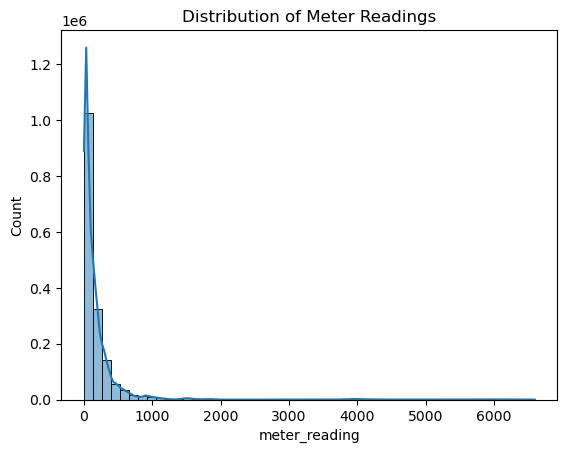

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.histplot(df["meter_reading"], bins=50, kde=True)
plt.title("Distribution of Meter Readings")
plt.show()

In [44]:
df["meter_reading"].skew()

np.float64(9.149681533380923)

he distribution of meter readings is strongly right-skewed with a heavy tail, indicating that most observations represent typical consumption, while a small fraction are extreme values. There is a single dominant peak, suggesting one common usage pattern across buildings.

### Outlier check

In [ ]:
Q1 = df["meter_reading"].quantile(0.25)
Q3 = df["meter_reading"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df["meter_reading"] < lower) | (df["meter_reading"] > upper)]
len(outliers)  #Using IQR method to identify outliers in meter readings

125938

In [48]:
extreme_value = 125938

df[df["meter_reading"] == extreme_value]

,building_id,timestamp,meter_reading,anomaly,time_diff


Extreme values ≠ anomalies automatically. Not every high meter reading is a theft or tampering. Some buildings just consume a lot of energy.

In [49]:
df["anomaly"].value_counts()
df["anomaly"].value_counts(normalize=True) * 100

anomaly
0    97.868184
1     2.131816
Name: proportion, dtype: float64

Analysis of the anomaly column shows that 97.87% of the observations are labeled as normal (0), while only 2.13% are labeled as anomalies (1) - highly imbalanced dataset. We may need Anomaly detection methods, Oversampling techniques (SMOTE, ADASYN) or Specialized evaluation metrics (precision, recall, F1)